# Задание:

- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.

Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
2. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

Средства и способы визуализации данных можно посмотреть здесь.

# Текстовое описание датасета

В качестве датасета будем использовать набор данных, содержащий данные с информацией об автомобиле.Данный набор доступен по адресу:https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset

Набор данных имеет следующие атрибуты:

- Name: Уникальный идентификатор для каждого автомобиля.
- MPG: Эффективность использования топлива измеряется в милях на галлон.
- Cylinders: количество цилиндров в двигателе.
- Displacement: объем двигателя с указанием его размера или мощности.
- Horsepower: Выходная мощность двигателя.
- Weight: Вес автомобиля.
- Acceleration: Возможность увеличения скорости, измеряемая в секундах.
- Model Year: год выпуска модели автомобиля.
- Origin: Страна или регион происхождения каждого автомобиля.



### Импорт библиотек


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

### Загрузка данных

In [198]:
car_data = pd.read_csv("Automobile.csv")

### Основные характеристики датасета 

Выведем первые строки 

In [199]:
car_data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.00,8,307.00,130.00,3504,12.00,70,usa
1,buick skylark 320,15.00,8,350.00,165.00,3693,11.50,70,usa
2,plymouth satellite,18.00,8,318.00,150.00,3436,11.00,70,usa
3,amc rebel sst,16.00,8,304.00,150.00,3433,12.00,70,usa
4,ford torino,17.00,8,302.00,140.00,3449,10.50,70,usa


In [200]:
car_data.shape

(398, 9)

In [201]:
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,75.00,2223.75,13.83,73.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00
75%,29.00,8.00,262.00,126.00,3608.00,17.18,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [202]:
car_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


In [203]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Определим уникальные значения для целевого признака (год производства):

In [205]:
car_data['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

Целевой признак содержит только  3 значения.

### Визуальное исследование датасета

Диаграмма рассеяния - распределение двух столбцов данных и отображение визуальной зависимости между ними:

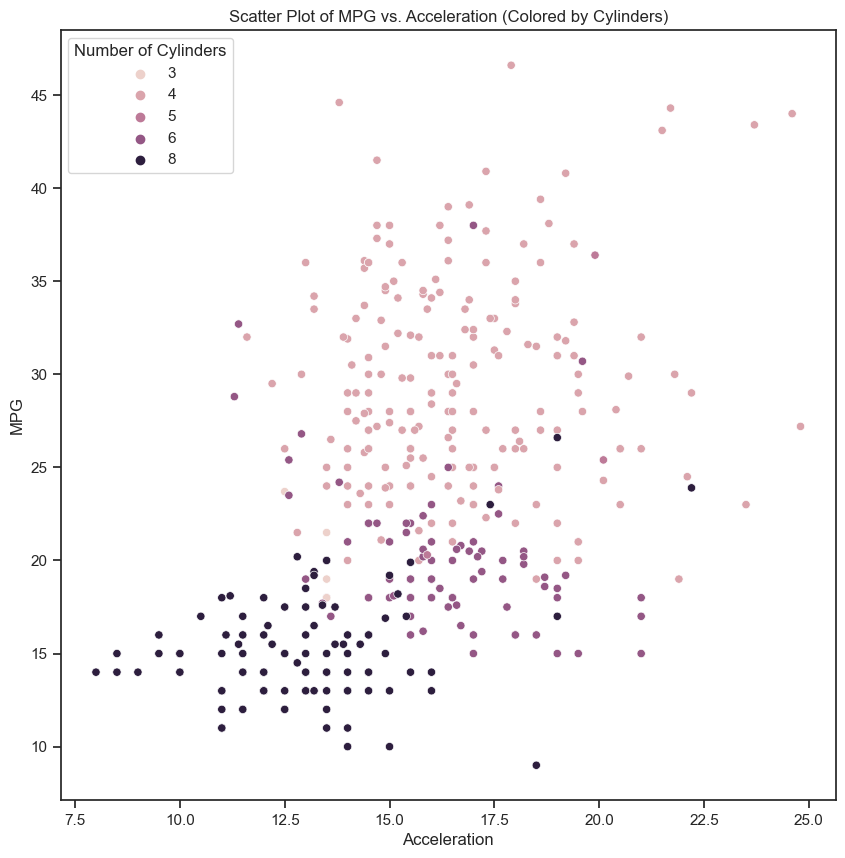

In [208]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(x='acceleration', y='mpg', hue='cylinders', data=car_data)
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.title('Scatter Plot of MPG vs. Acceleration (Colored by Cylinders)')
plt.legend(title='Number of Cylinders',loc = "best")
plt.show()

Гистограмма отображает плотность вероятности распределения данных:

<Axes: xlabel='mpg', ylabel='Density'>

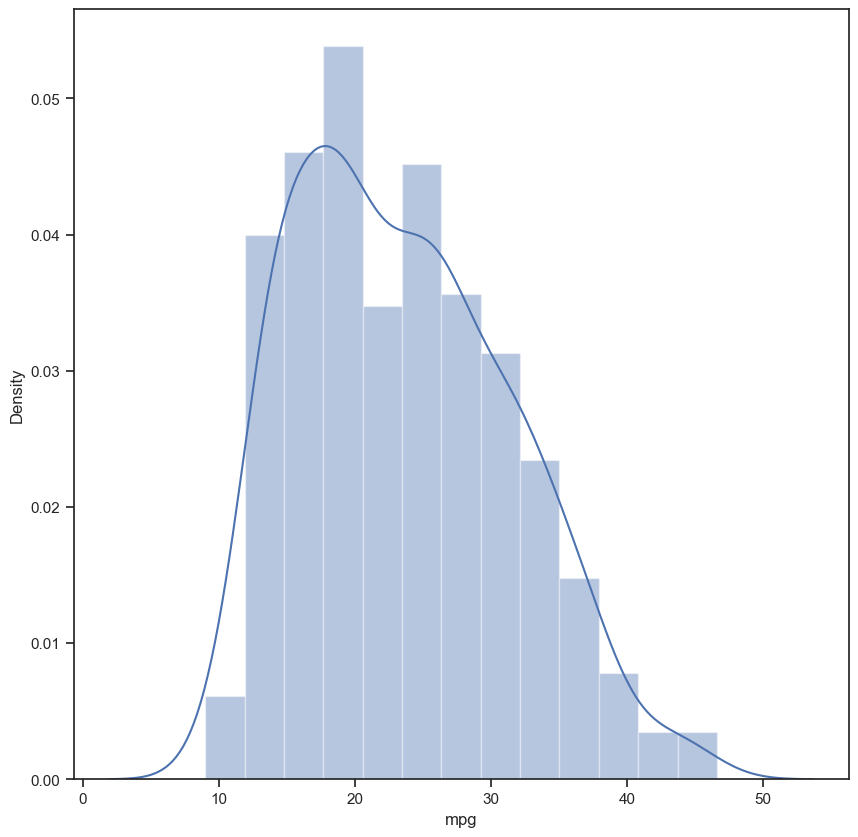

In [209]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(car_data['mpg'])

Комбинация гистограмм и диаграмм рассеивания выполняется с помощью jointplot:

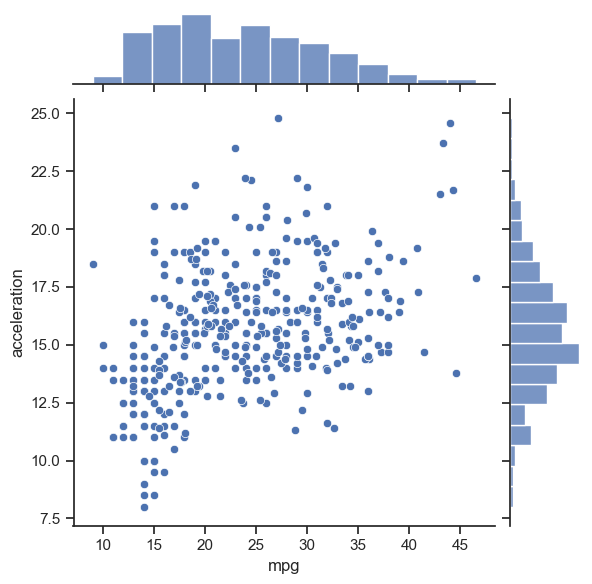

In [211]:
sns.jointplot(x='mpg', y='acceleration', data=car_data)

Данные можно представить в виде парных диаграмм - матрицы графиков:

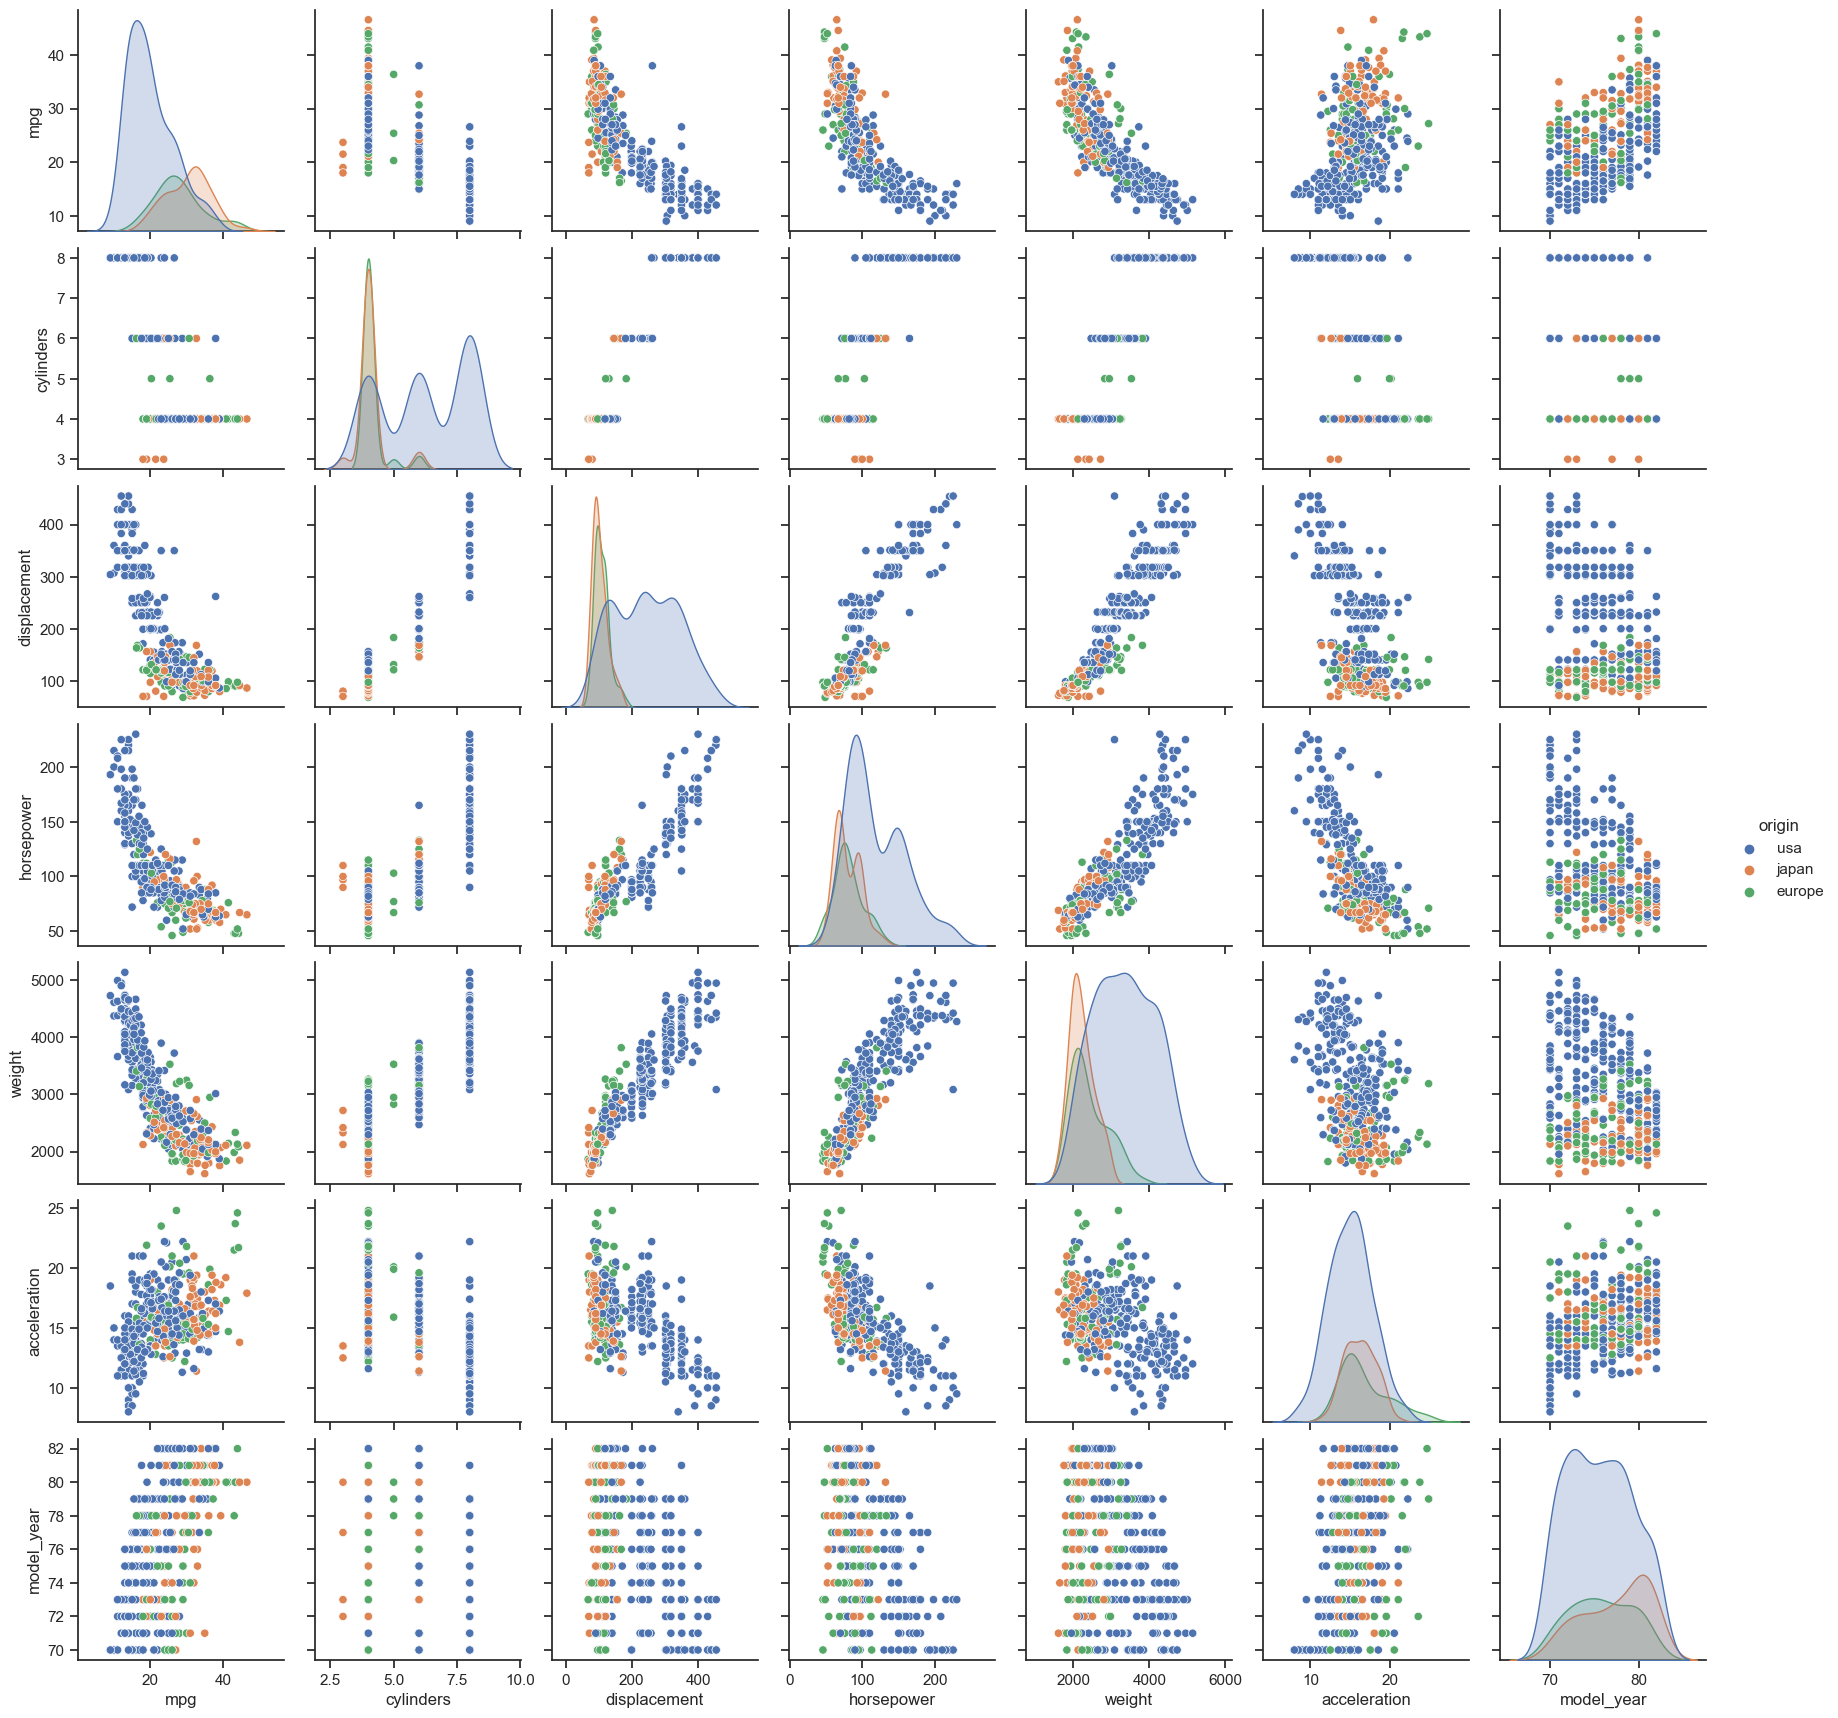

In [214]:
sns.pairplot(car_data, hue="origin")

Отображение в виде "Ящика с усами":

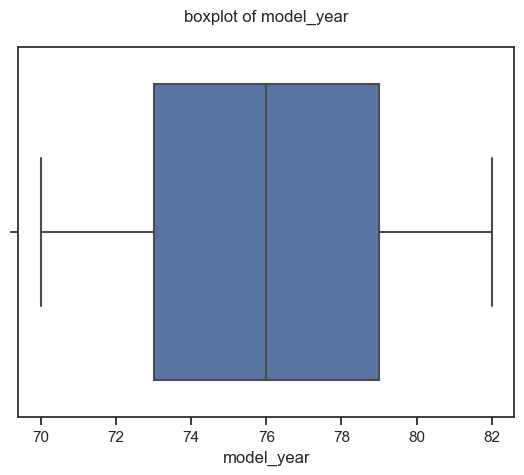

In [216]:
sns.boxplot(data=car_data,x='model_year')
plt.title('boxplot of model_year\n')
plt.show()

<Axes: xlabel='cylinders', ylabel='horsepower'>

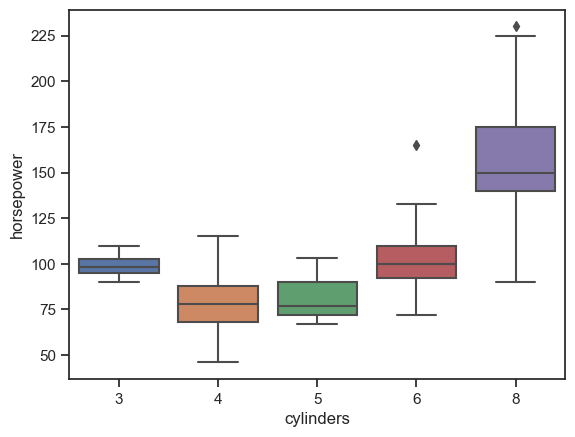

In [218]:
sns.boxplot(x='cylinders', y='horsepower', data=car_data)

Он показывает мощность двигателя автомобиля в зависимости от цилиндра.

Violin Plot дополнительно показывает распределение плотности:

<Axes: xlabel='cylinders', ylabel='horsepower'>

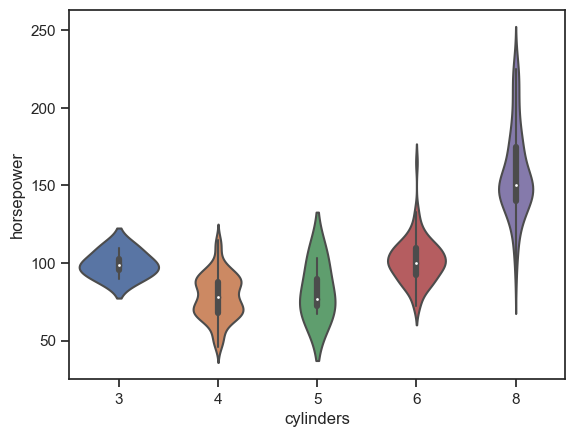

In [219]:
sns.violinplot(x='cylinders', y='horsepower', data=car_data)

In [221]:
average_mpg_year_origin = df.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
average_mpg_year_origin

origin,europe,japan,usa
model_year,,,
70,25.20,25.50,15.27
71,28.75,29.50,18.10
72,22.00,24.20,16.28
73,24.00,20.00,15.03
74,27.00,29.33,18.33
75,24.50,27.50,17.55
76,24.25,28.00,19.43
77,29.25,27.42,20.72
78,24.95,29.69,21.77


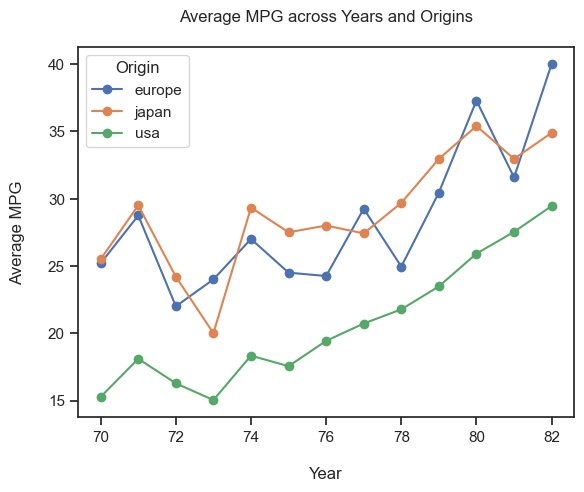

In [224]:
average_mpg_year_origin.plot(marker='o')
plt.xlabel('\nYear')
plt.ylabel('Average MPG\n')
plt.title('Average MPG across Years and Origins\n')
plt.legend(title='Origin')
plt.show()

Показывает как средний показатель MPG варьируется в зависимости от года и происхождения?

Text(0.5, 1.0, 'Top 10 horsepower\n')

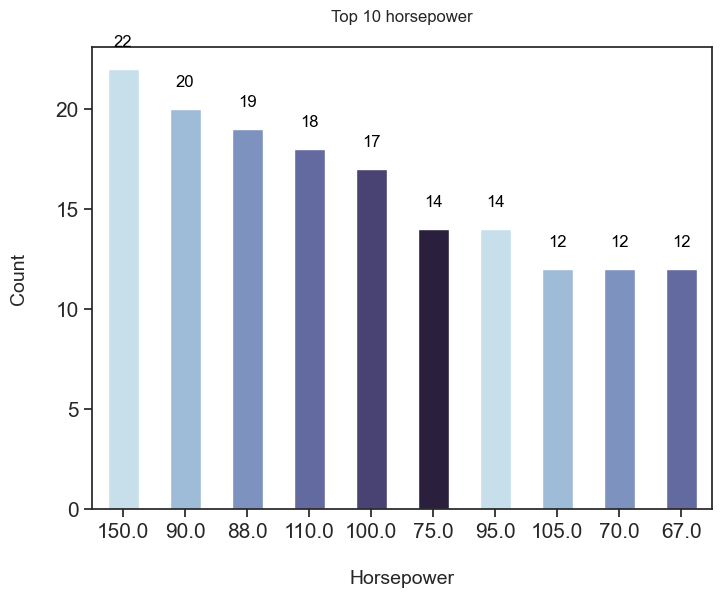

In [225]:
plt.figure(figsize = (8, 6))
ax = df["horsepower"].value_counts().head(10).plot(kind = 'bar', color = sns.color_palette("ch:s=.25,rot=-.25"), rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Horsepower', fontsize = 14, labelpad = 20)
plt.ylabel('Count', fontsize = 14, labelpad = 20);
plt.title('Top 10 horsepower\n')

Топ 10 мощностей двигателя

<Axes: ylabel='origin'>

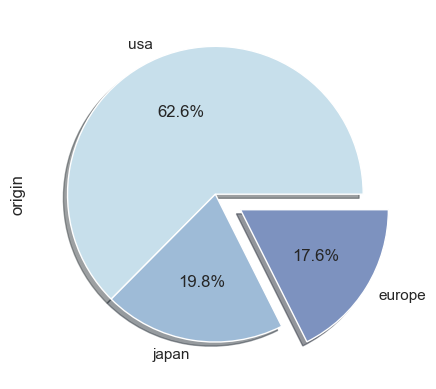

In [226]:
df.origin.value_counts().plot(kind="pie",autopct="%0.1f%%",explode=[0,0,0.2],shadow=True,
                              colors=sns.color_palette("ch:s=.25,rot=-.25"))

Процент автомобилей произведенной той или иной страной

### Информация о корреляции признаков

Проверка корреляции помогает найти корреляции с целевом признаком (информативные для машинного обучения), а также выявить линейно независимые нецелевые признаки.

Построим корреляционную матрицу:

In [227]:
car_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


Выше была построена матрица корреляции по Пирсону, но также можно построить матрицы по критерию Кендалла и Спирмена.

In [228]:
car_data.corr(method='kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.69,-0.68,-0.68,-0.69,0.30,0.41
cylinders,-0.69,1.00,0.79,0.69,0.74,-0.37,-0.27
displacement,-0.68,0.79,1.00,0.72,0.80,-0.35,-0.22
horsepower,-0.68,0.69,0.72,1.00,0.70,-0.49,-0.28
weight,-0.69,0.74,0.80,0.70,1.00,-0.27,-0.20
acceleration,0.30,-0.37,-0.35,-0.49,-0.27,1.00,0.20
model_year,0.41,-0.27,-0.22,-0.28,-0.20,0.20,1.00


In [229]:
car_data.corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.82,-0.86,-0.85,-0.87,0.44,0.57
cylinders,-0.82,1.00,0.91,0.82,0.87,-0.47,-0.34
displacement,-0.86,0.91,1.00,0.88,0.95,-0.50,-0.31
horsepower,-0.85,0.82,0.88,1.00,0.88,-0.66,-0.39
weight,-0.87,0.87,0.95,0.88,1.00,-0.40,-0.28
acceleration,0.44,-0.47,-0.50,-0.66,-0.40,1.00,0.27
model_year,0.57,-0.34,-0.31,-0.39,-0.28,0.27,1.00


Для визуализации корреляционных матриц используют тепловую карту:

<Axes: >

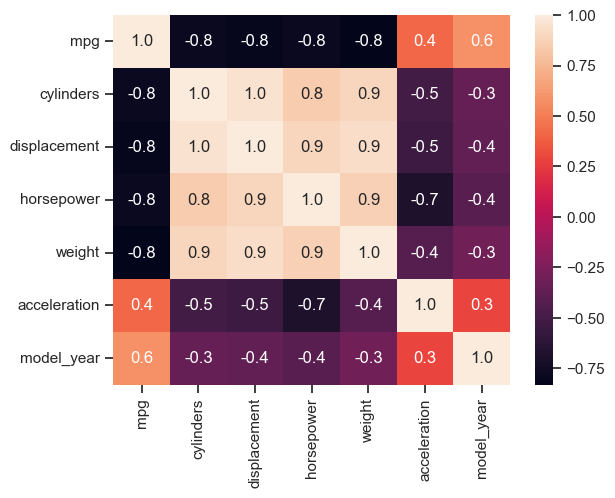

In [231]:
sns.heatmap(car_data.corr(), annot=True, fmt='.1f')

Text(0.5, 0.98, 'Корреляционные матрицы, построенные методами Пирсона, Кендалла и Спирмана')

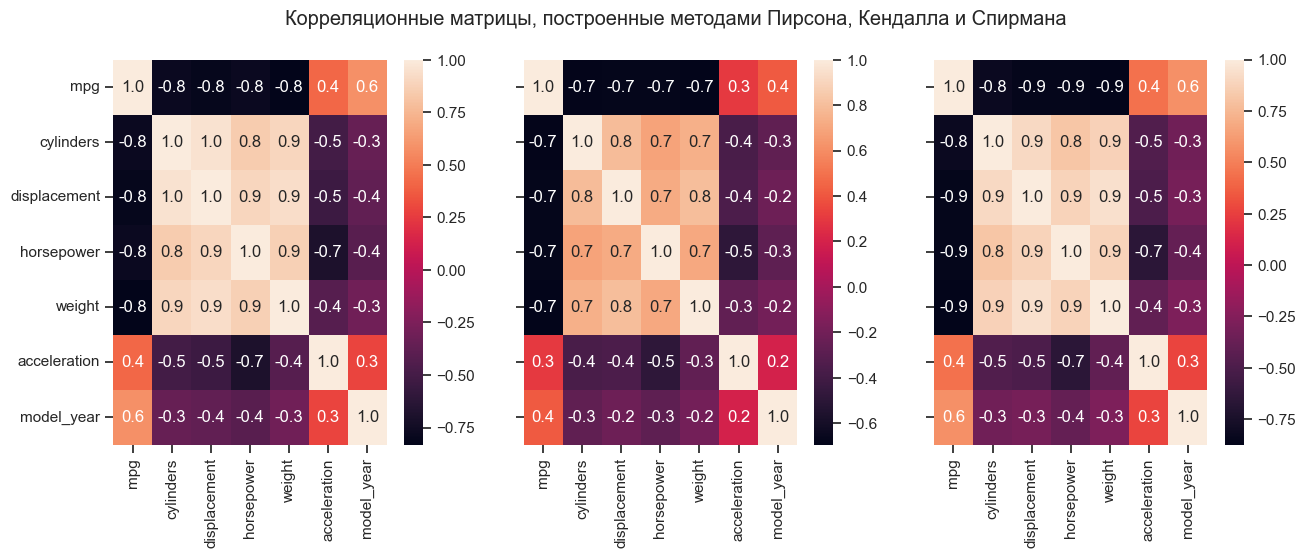

In [233]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(car_data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(car_data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(car_data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные методами Пирсона, Кендалла и Спирмана')

Также можно вывести треугольную матрицу:

<Axes: >

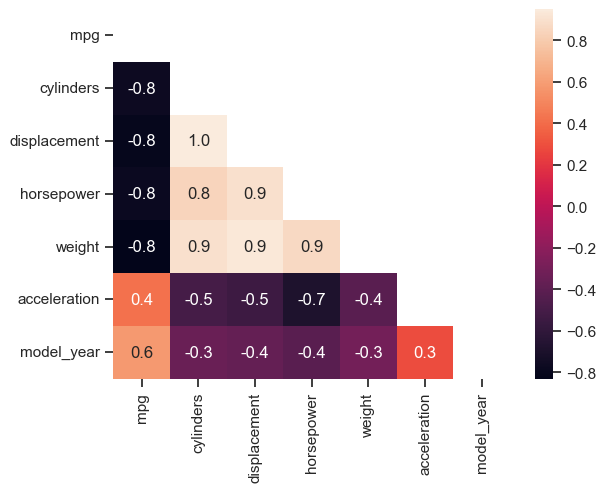

In [235]:
mask = np.zeros_like(car_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(car_data.corr(), mask=mask, annot=True, fmt='.1f')